# Imbrium

In [1]:
import imbrium
print(imbrium.__version__)

0.1.5


## Univariate Multistep Standard Predictor example: LSTM

In [2]:
from imbrium.predictors.univarstandard import *

In [3]:
data = pd.read_csv('tests/example_dataset/CaliforniaHousing.csv')
data = data['target']

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1648/1650 [============================>.] - ETA: 0s - loss: 0.0687 - mean_squared_error: 0.0687WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002249309D438> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_V

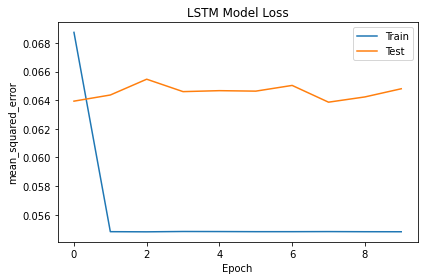

In [4]:
predictor1 = BasicMultStepUniVar(steps_past =  5, steps_future = 10, data = data, scale = 'normalize')
predictor1.create_lstm(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (20, 'relu'), 'layer1': (25,'relu'), 'layer2': (5, 'relu')})
predictor1.fit_model(epochs = 10, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor1.show_performance()

In [5]:
predictor1.predict(data.tail(5))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


,LSTM
0,0.379805
1,0.382897
2,0.378972
3,0.378996
4,0.382047
5,0.381821
6,0.382498
7,0.380051
8,0.384041
9,0.383984


In [6]:
predictor1.model_blueprint()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 20)             1760      
                                                                 
 lstm_1 (LSTM)               (None, 5, 25)             4600      
                                                                 
 lstm_2 (LSTM)               (None, 5)                 620       
                                                                 
 dense (Dense)               (None, 10)                60        
                                                                 
Total params: 7,040
Trainable params: 7,040
Non-trainable params: 0
_________________________________________________________________


## Univariate Multistep Hybrid Predictor example: CNN-LSTM

In [ ]:
from imbrium.predictors.univarhybrid import *

In [ ]:
predictor2 = HybridMultStepUniVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'normalize')
predictor2.create_cnnlstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (25, 'relu'), 'layer4': (10, 'relu')})
predictor2.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor2.show_performance()

In [ ]:
predictor2.predict(data.tail(10))

In [ ]:
predictor2.model_blueprint()

## Multivariate Multistep Standard Predictor example: LSTM

In [ ]:
from imbrium.predictors.multivarstandard import *

In [ ]:
data = pd.read_csv('tests/example_dataset/CaliforniaHousing.csv')

In [ ]:
predictor3 = BasicMultStepMultVar(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor3.create_lstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')})
predictor3.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, batch_size = 10, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor3.show_performance()

In [ ]:
predictor3.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))

In [ ]:
predictor3.model_blueprint()

## Multivariate Multistep Hybrid Predictor example: CNN-LSTM

In [ ]:
from imbrium.predictors.multivarhybrid import *

In [ ]:
predictor4 = HybridMultStepMultVar(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'])
predictor4.create_cnnlstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')})
predictor4.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20, batch_size = 10)
predictor4.show_performance()

In [ ]:
predictor4.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))

In [ ]:
predictor4.model_blueprint()